# **LAB 4 - MONTECARLO/BLACKJACK**

* **Juan Esteban Alarcón Bravo** \\
* **Juan Sebastián Ruiz Sánchez** \\
* **Xamir Ernesto Rojas Gamboa**

---

*Imports previos al desarrollo*

In [1]:
import random as r
import matplotlib.pyplot as plt
import collections

---

## **Punto 1**

***Calculate the probability of getting a 21 drawing cards sequentially from shuffled Spanish deck and from a shuffled Poker deck.*** \\
*(Case 1: Figures have **different** value).*

Definimos la función encargada de determinar la probabilidad de obtención de una 21, llamada `sacar_21(start_count,d)`. El parámetro `start_count` es el valor total de las cartas en la mano. El parámetro `d` determina el tipo de baraja que se usará. Este parámetro tiene la forma `"<deck><case>"`, en donde `<deck>` puede ser `spanish` para la **Baraja Española** de 48 Cartas o `poker` para la **Baraja de Poker** de 52 cartas y `<case>` puede ser `C1` para el **Caso 1** (en donde todas las figuras toman valores diferentes) o `C2` para el **Caso 2** (en donde todas las figuras toman el mismo valor). \\

Para este punto es necesario que `<case>` de `d` sea siempre **C1** y que `start_count` sea **0** (ya que la mano está vacía).

In [2]:
def sacar_21(start_count,d):
  # Se inicializan algunas variables claves.
  successful_events = 0
  rep = 10000000

  # Definición de las distintas Barajas
  spanish_deckC1 = [1,2,3,4,5,6,7,8,9,10,11,12,
                    1,2,3,4,5,6,7,8,9,10,11,12,
                    1,2,3,4,5,6,7,8,9,10,11,12,
                    1,2,3,4,5,6,7,8,9,10,11,12]

  poker_deckC1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,
                  1,2,3,4,5,6,7,8,9,10,11,12,13,
                  1,2,3,4,5,6,7,8,9,10,11,12,13,
                  1,2,3,4,5,6,7,8,9,10,11,12,13]

  spanish_deckC2 = [1,2,3,4,5,6,7,8,9,10,10,10,
                    1,2,3,4,5,6,7,8,9,10,10,10,
                    1,2,3,4,5,6,7,8,9,10,10,10,
                    1,2,3,4,5,6,7,8,9,10,10,10]

  poker_deckC2 = [1,2,3,4,5,6,7,8,9,10,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10,10]

  # Lista del Número de Cartas que se necesitaron en la iteración para llegar a 21 exactos:
  cards_to_win_list = []

  # Se crea la baraja de la simulación
  if d == "spanishC1":
    deck_sim = spanish_deckC1
  if d == "pokerC1":
    deck_sim = poker_deckC1
  if d == "spanishC2":
    deck_sim = spanish_deckC2
  if d == "pokerC2":
    deck_sim = poker_deckC2

  for _ in range(rep):

    # Se inicializa la baraja de la iteración.
    deck = deck_sim.copy()

    # Se establecen los puntos previos.
    count = start_count
    cards_to_win = 0
    
    # Mientras no se llegue a 21 puntos o se pase, se sacan cartas del deck.
    while count < 21:
      # Se toma una carta aleatoria (sin repetir la misma) del deck.
      card = r.choice(deck)
      deck.remove(card)
      # Se lleva la cuenta de la repetición con la nueva carta .
      count += card
      # Se suma una carta para ganar.
      cards_to_win += 1
    
    # si se ganó, se agregan el numero de cartas que se necesitaron para ganar a la lista.
    if count == 21:
      successful_events += 1
      cards_to_win_list.append(cards_to_win)

  # se obtienen una tupla del numero de cartas que se necesitaron para ganar sin repetir
  """
  Ejemplo:
  cards_to_win_list = [1,1,1,2,1,2,2,2,3,3,3]
  cards_to_win = list(set(cards_to_win_list)) ==> (1,2,3)
  """
  cards_to_win = list(set(cards_to_win_list))
  # Se crea una lista para el numero de veces que se necesito ese número de cartas para ganar.
  n_cards = []
  # Se cuenta el numero de veces que se necesito esa número de cartas para completar 21 y se agrega a la lista.
  for card in cards_to_win:
    n_cards.append(cards_to_win_list.count(card))

  # Se hace el histograma.
  chart = plt.bar(cards_to_win,n_cards,align='center',alpha=0.5)
  plt.xticks(cards_to_win,cards_to_win)
  plt.show

  # Se calcula la probabilidad.
  prob = (successful_events / rep)*100

  # Se imprime el texto.
  if d == "spanishC1":
    deck_name = "Española (Caso 1)"
  if d == "pokerC1":
    deck_name = "de Poker (Caso 1)"
  if d == "spanishC2":
    deck_name = "Española (Caso 2)"
  if d == "pokerC2":
    deck_name = "de Poker (Caso 2)"
  print("La probabilidad de completar 21 consecutivamente con una Baraja {2} es aproximadamente de: {0} % (partiendo con un puntaje de {1})".format(prob,start_count,deck_name))

### *Baraja Española*

La probabilidad de completar 21 consecutivamente con una Baraja Española (Caso 1) es aproximadamente de: 15.761330000000001 % (partiendo con un puntaje de 0)


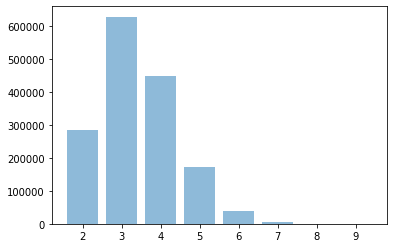

In [3]:
sacar_21(0,"spanishC1")

### *Baraja de Poker*

La probabilidad de completar 21 consecutivamente con una Baraja de Poker (Caso 1) es aproximadamente de: 14.465910000000001 % (partiendo con un puntaje de 0)


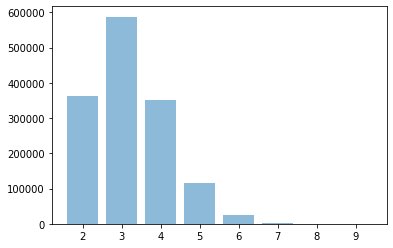

In [4]:
sacar_21(0,"pokerC1")

## **Punto 2**

***Calculate the probability of getting a 21 drawing cards sequentially from shuffled Spanish deck and from a shuffled Poker deck.*** \\
*(Case 2: Figures have the **same** value).*



Tenemos la misma función del punto anterior, pero esta vez tendremos `<case>` del parámetro `d` siempre en **C2**.

### *Baraja Española*

La probabilidad de completar 21 consecutivamente con una Baraja Española (Caso 2) es aproximadamente de: 14.96764 % (partiendo con un puntaje de 0)


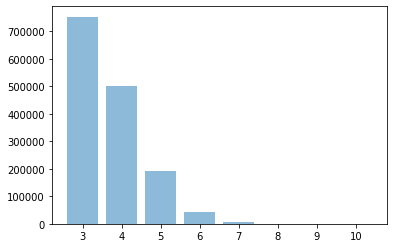

In [5]:
sacar_21(0,"spanishC2")

### *Baraja de Poker*

La probabilidad de completar 21 consecutivamente con una Baraja de Poker (Caso 2) es aproximadamente de: 14.000960000000001 % (partiendo con un puntaje de 0)


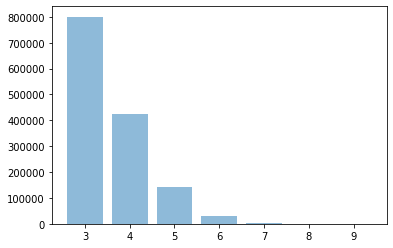

In [6]:
sacar_21(0,"pokerC2")

## **Punto 3**

***Calculate the probability of getting a 21, with the Spanish and Poker decks, assuming that you are in the middle of the game and the remaining deck has $\tfrac{n}{2}$ cards and you have the cards $7,7,5$ in your hand.***



Para este punto es necesario definir una nueva función: `sacar_21_alter(deck_type, size, hand)`. El parámetro `deck_type` es el tipo de baraja que se usará: `spanish` para la **Baraja Española** y `poker` para la **Baraja de Póker**. El parámetro `size` es la cantidad de **cartas restantes** en la baraja. El parámetro `hand` es una lista de las cartas que el jugador actualmente tiene en su **mano**; estas cartas no aparecerán en la baraja por esta misma razón.

In [7]:
def sacar_21_alter(deck_type, size, hand):
  # Se inicializan algunas variables claves.
  start_count = sum(hand)
  successful_events = 0
  rep = 10000000

  # Definición de las Barajas Completas
  spanish_deck = [1,2,3,4,5,6,7,8,9,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10]

  poker_deck = [1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10]

  # Se selecciona el tipo de baraja deseado.
  if deck_type == "spanish":
    d = spanish_deck
  if deck_type == "poker":
    d = poker_deck

  for i in hand:
    d.remove(i)

  # Lista del Número de Cartas que se necesitaron en la iteración para llegar a 21 exactos:
  cards_to_win_list = []

  # Se crea la baraja de la simulación.
  deck_sim = r.sample(d,size)

  for _ in range(rep):

    # Inicializamos el deck de esta iteración basado en el deck escogido.
    deck = deck_sim.copy()

    # Se establecen los puntos previos.
    count = start_count
    cards_to_win = 3

    # Mientras no se llegue a 21 puntos o se pase, se sacan cartas del deck.
    while count < 21:
      # Se toma una carta aleatoria (sin repetir la misma) del deck.
      card = r.choice(deck)
      deck.remove(card)
      # Se lleva la cuenta de la repetición con la nueva carta .
      count += card
      # Se suma una carta para ganar.
      cards_to_win += 1
    
    # si se ganó, se agregan el numero de cartas que se necesitaron para ganar a la lista.
    if count == 21:
      successful_events += 1
      cards_to_win_list.append(cards_to_win)

  # Se obtienen una tupla del numero de cartas que se necesitaron para ganar sin repetir
  """
  Ejemplo:
  cards_to_win_list = [1,1,1,2,1,2,2,2,3,3,3]
  cards_to_win = list(set(cards_to_win_list)) ==> (1,2,3)
  """
  cards_to_win = list(set(cards_to_win_list))
  # Se crea una lista para el numero de veces que se necesito ese número de cartas para ganar.
  n_cards = []
  # Se cuenta el numero de veces que se necesito esa número de cartas para completar 21 y se agrega a la lista.
  for card in cards_to_win:
    n_cards.append(cards_to_win_list.count(card))

  # Se hace el histograma.
  chart = plt.bar(cards_to_win,n_cards,align='center',alpha=0.5)
  plt.xticks(cards_to_win,cards_to_win)
  plt.show

  # Se calcula la probabilidad.
  prob = (successful_events / rep)*100

  # Se imprime el texto.
  if deck_type == "spanish":
    deck_name = "Española"
  if deck_type == "poker":
    deck_name = "de Poker"

  print("La probabilidad de completar 21 con una Baraja {2} con {3} cartas restantes y teniendo {4} ({1} puntos) en la mano es aproximadamente de: {0} %".format(prob, start_count, deck_name, size, hand))
  print("La baraja de la simulación fue: {0}".format(deck_sim))

### *Baraja Española*

La probabilidad de completar 21 con una Baraja Española con 24 cartas restantes y teniendo [7, 7, 5] (19 puntos) en la mano es aproximadamente de: 13.58871 %
La baraja de la simulación fue: [1, 10, 6, 7, 8, 10, 4, 5, 10, 4, 3, 5, 2, 2, 1, 9, 4, 1, 4, 7, 2, 5, 3, 10]


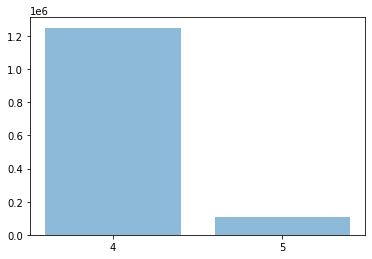

In [8]:
sacar_21_alter("spanish", 24, [7,7,5])

### *Baraja de Poker*

La probabilidad de completar 21 con una Baraja de Poker con 26 cartas restantes y teniendo [7, 7, 5] (19 puntos) en la mano es aproximadamente de: 11.84954 %
La baraja de la simulación fue: [3, 8, 10, 1, 10, 1, 10, 2, 8, 9, 10, 8, 9, 10, 6, 2, 2, 10, 10, 4, 3, 6, 5, 9, 7, 7]


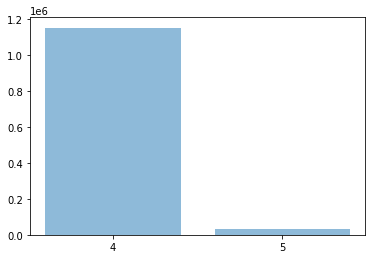

In [9]:
sacar_21_alter("poker", 26, [7,7,5])

## **Punto 4**

***Find the remaining decks for Spanish and Poker card decks, with the number of cards according to the list below, with highest (hot deck) and lowest (cold deck) probabilities of getting 21 assuming that you have cards [7,7,5]. Calculate the probabilities analytically and verify them with Montecarlo. Plot the experimental distribution of the numbers of card requires to complete 21 in 10.000 simulations.*** \\

* *12 Remaining Cards*
* *10 Remaining Cards*


> ***Definición:*** Una **Baraja Caliente** es aquella que contiene las 8 cartas con las que es posible lograr una 21 teniendo en cuenta que el valor de la mano es de 19: Cuatro Aces y Cuatro Doses.

> ***Definición:*** una **Baraja Fría** es aquella que no contiene ninguna de estas ocho cartas.

Suponiendo que tenemos originalmente barajas española y de poker de 40 y 52 cartas, respectivamente, en donde las figuras tienen el mismo valor (10).

Si en nuestra mano tenemos las cartas $7,7,5$, eso significaría que las cartas disponibles en ambas barajas son 37 y 49, respectivamente.

Esto significa que podemos tomar ese número de cartas y permutarlos en nuestro deck de cartas restantes de tamaño `n`, en donde `n` es un valor que depende del caso que estemos analizando, así:

### *Baraja Española*

#### **Caso 1: 12 Cartas Restantes**

Para este caso, la cantidad total de barajas de 12 cartas que se pueden armar con las 45 cartas totales restantes es $\boxed{P(45,12)}$.

La cantidad de **barajas calientes** que se pueden formar es de $\boxed{12! \, \ast \, P(37,4)}$. El valor de $12!$ se refiere a todas las maneras en las que podemos organizar una baraja de 12 cartas con 8 cartas obligatorias (`1 1 1 1 2 2 2 2 _ _ _ _`). $P(37,4)$ se refiere a todas las formas que hay de llenar los 4 espacios restantes con las otras 37 cartas que no se han usado.

La cantidad de **barajas frías** que se pueden formar es de $\boxed{P(37,12)}$. Esto no es más que la permutación de las 37 cartas disponibles en los 12 espacios de la baraja que se deben llenar.

\begin{align*}
  \text{Total de Barajas Posibles} &= P(45,12) \approx 1,37 \ast 10^{19} \\
  \text{Total de Barajas Calientes} &= 12! \, \ast \, P(37,4) \approx 7,59 \ast 10^{14} \\
  \text{Total de Barajas Frías} &= P(37,12) \approx 8,87 \ast 10^{17}
\end{align*}

---

\begin{align*}
  \text{Total de Barajas Posibles} &= 100\% \\
  \text{Total de Barajas Calientes} &\approx 0,0055\% \\
  \text{Total de Barajas Frías} &\approx 6,44\%
\end{align*}

La probabilidad de **obtener 21 en una baraja caliente** , en este caso, donde la mano es 19, es igual a la suma de dos sucesos independientes:

* Sacar dos aces seguidos.
* Sacar un dos.

Teniendo en cuenta que la baraja caliente tiene 4 aces y 4 doses, tenemos que:
$$
  P_h = \left( \frac{4}{12} \ast \frac{3}{11} \right) + \frac{4}{12} = \frac{14}{33} \approx \boxed{42,42\%}
$$

La probabilidad de **obtener 21 en una baraja fría** es siempre del $0\%$
$$
  P_f = \boxed{0\%}
$$

La probabilidad de completar 21 con una Baraja Española con 12 cartas restantes y teniendo [7, 7, 5] (19 puntos) en la mano es aproximadamente de: 8.33971 %
La baraja de la simulación fue: [10, 10, 2, 5, 4, 10, 8, 1, 10, 5, 10, 6]


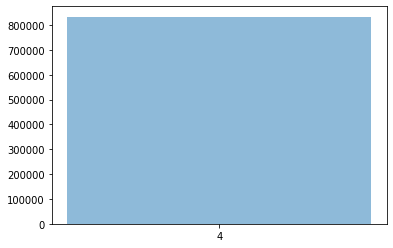

In [10]:
sacar_21_alter("spanish", 12, [7,7,5])

#### **Caso 2: 10 Cartas Restantes**

Para este caso, la cantidad total de barajas de 10 cartas que se pueden armar con las 45 cartas totales restantes es $\boxed{P(45,10)}$.

La cantidad de **barajas calientes** que se pueden formar es de $\boxed{10! \, \ast \, P(37,2)}$. El valor de $10!$ se refiere a todas las maneras en las que podemos organizar una baraja de 10 cartas con 8 cartas obligatorias (`1 1 1 1 2 2 2 2 _ _`). $P(37,2)$ se refiere a todas las formas que hay de llenar los 2 espacios restantes con las otras 37 cartas que no se han usado.

La cantidad de **barajas frías** que se pueden formar es de $\boxed{P(37,10)}$. Esto no es más que la permutación de las 37 cartas disponibles en los 10 espacios de la baraja que se deben llenar.

\begin{align*}
  \text{Total de Barajas Posibles} &= P(45,10) \approx 1,16 \ast 10^{16} \\
  \text{Total de Barajas Calientes} &= 10! \, \ast \, P(37,2) \approx 4,83 \ast 10^{9} \\
  \text{Total de Barajas Frías} &= P(37,10) \approx 1,26 \ast 10^{15}
\end{align*}

---

\begin{align*}
  \text{Total de Barajas Posibles} &= 100\% \\
  \text{Total de Barajas Calientes} &\approx 0,00004\% \\
  \text{Total de Barajas Frías} &\approx 10,91\%
\end{align*}

La probabilidad de **obtener 21 en una baraja caliente** , en este caso, donde la mano es 19, es igual a la suma de dos sucesos independientes:

* Sacar dos aces seguidos.
* Sacar un dos.

Teniendo en cuenta que la baraja caliente tiene 4 aces y 4 doses, tenemos que:
$$
  P_h = \left( \frac{4}{10} \ast \frac{3}{9} \right) + \frac{4}{10} = \frac{8}{15} \approx \boxed{53,33\%}
$$

La probabilidad de **obtener 21 en una baraja fría** es siempre del $0\%$
$$
  P_f = \boxed{0\%}
$$

La probabilidad de completar 21 con una Baraja Española con 10 cartas restantes y teniendo [7, 7, 5] (19 puntos) en la mano es aproximadamente de: 0.0 %
La baraja de la simulación fue: [10, 3, 8, 4, 6, 7, 10, 10, 4, 9]


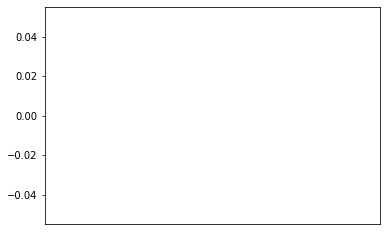

In [11]:
sacar_21_alter("spanish", 10, [7,7,5])

### *Baraja de Poker*

#### **Caso 1: 12 Cartas Restantes**

Para este caso, la cantidad total de barajas de 12 cartas que se pueden armar con las 49 cartas totales restantes es $\boxed{P(49,12)}$.

La cantidad de **barajas calientes** que se pueden formar es de $\boxed{12! \, \ast \, P(41,4)}$. El valor de $12!$ se refiere a todas las maneras en las que podemos organizar una baraja de 12 cartas con 8 cartas obligatorias (`1 1 1 1 2 2 2 2 _ _ _ _`). $P(41,4)$ se refiere a todas las formas que hay de llenar los 4 espacios restantes con las otras 41 cartas que no se han usado.

La cantidad de **barajas frías** que se pueden formar es de $\boxed{P(41,12)}$. Esto no es más que la permutación de las 41 cartas disponibles en los 12 espacios de la baraja que se deben llenar.

\begin{align*}
  \text{Total de Barajas Posibles} &= P(49,12) \approx 4,41 \ast 10^{19} \\
  \text{Total de Barajas Calientes} &= 12! \, \ast \, P(41,4) \approx 1,16 \ast 10^{15} \\
  \text{Total de Barajas Frías} &= P(41,12) \approx 3,78 \ast 10^{18}
\end{align*}

---

\begin{align*}
  \text{Total de Barajas Posibles} &= 100\% \\
  \text{Total de Barajas Calientes} &\approx 0,002\% \\
  \text{Total de Barajas Frías} &\approx 8,56\%
\end{align*}

La probabilidad de **obtener 21 en una baraja caliente** , en este caso, donde la mano es 19, es igual a la suma de dos sucesos independientes:

* Sacar dos aces seguidos.
* Sacar un dos.

Teniendo en cuenta que la baraja caliente tiene 4 aces y 4 doses, tenemos que:
$$
  P_h = \left( \frac{4}{12} \ast \frac{3}{11} \right) + \frac{4}{12} = \frac{14}{33} \approx \boxed{42,42\%}
$$

La probabilidad de **obtener 21 en una baraja fría** es siempre del $0\%$
$$
  P_f = \boxed{0\%}
$$

La probabilidad de completar 21 con una Baraja de Poker con 12 cartas restantes y teniendo [7, 7, 5] (19 puntos) en la mano es aproximadamente de: 8.333300000000001 %
La baraja de la simulación fue: [10, 8, 10, 10, 9, 4, 3, 7, 2, 1, 10, 8]


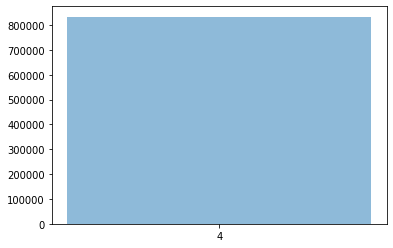

In [12]:
sacar_21_alter("poker", 12, [7,7,5])

#### **Caso 2: 10 Cartas Restantes**

Para este caso, la cantidad total de barajas de 10 cartas que se pueden armar con las 49 cartas totales restantes es $\boxed{P(49,10)}$.

La cantidad de **barajas calientes** que se pueden formar es de $\boxed{10! \, \ast \, P(41,2)}$. El valor de $10!$ se refiere a todas las maneras en las que podemos organizar una baraja de 10 cartas con 8 cartas obligatorias (`1 1 1 1 2 2 2 2 _ _`). $P(41,2)$ se refiere a todas las formas que hay de llenar los 2 espacios restantes con las otras 41 cartas que no se han usado.

La cantidad de **barajas frías** que se pueden formar es de $\boxed{P(41,10)}$. Esto no es más que la permutación de las 41 cartas disponibles en los 10 espacios de la baraja que se deben llenar.

\begin{align*}
  \text{Total de Barajas Posibles} &= P(49,10) \approx 2,98 \ast 10^{16} \\
  \text{Total de Barajas Calientes} &= 10! \, \ast \, P(41,2) \approx 5,95 \ast 10^{9} \\
  \text{Total de Barajas Frías} &= P(41,10) \approx 4,06 \ast 10^{15}
\end{align*}

---

\begin{align*}
  \text{Total de Barajas Posibles} &= 100\% \\
  \text{Total de Barajas Calientes} &\approx 0,00002\% \\
  \text{Total de Barajas Frías} &\approx 13,64\%
\end{align*}

La probabilidad de **obtener 21 en una baraja caliente** , en este caso, donde la mano es 19, es igual a la suma de dos sucesos independientes:

* Sacar dos aces seguidos.
* Sacar un dos.

Teniendo en cuenta que la baraja caliente tiene 4 aces y 4 doses, tenemos que:
$$
  P_h = \left( \frac{4}{10} \ast \frac{3}{9} \right) + \frac{4}{10} = \frac{8}{15} \approx \boxed{53,33\%}
$$

La probabilidad de **obtener 21 en una baraja fría** es siempre del $0\%$
$$
  P_f = \boxed{0\%}
$$

La probabilidad de completar 21 con una Baraja de Poker con 10 cartas restantes y teniendo [7, 7, 5] (19 puntos) en la mano es aproximadamente de: 2.22206 %
La baraja de la simulación fue: [8, 10, 5, 5, 8, 3, 10, 8, 1, 1]


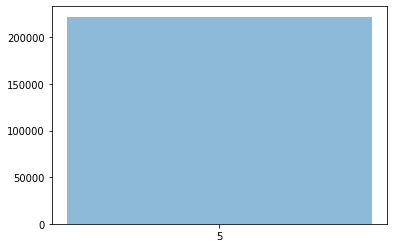

In [13]:
sacar_21_alter("poker", 10, [7,7,5])

## **Punto 5**

***If Ben goes to Vegas every weekend (Friday, Saturday and Sunday), plays every weekend day 10 hours, each game takes 3 mins. He gets the cards $7,7,5$ and a remaining hot deck with probability $\frac{1}{10}$. Asume that for cold decks the Ben has no cards and the remaining deck is the complete deck. He bets $\$1000$ on hot decks and $\$10$ on cold decks. What is the estimated amount of money that Ben wins or losses on a weekend?***



> Apostando 10 horas al día, por 3 días, con partidas de 3 minutos, Ben juega **600** partidas en un fin de semana.

Primero, escogemos la cantidad de partidas frías y calientes que jugará de esas 600 totales. Esto se hace sabiendo que la probabilidad de que una partida sea caliente es de $10\%$

In [14]:
# Escoger el tipo de juego (Hot 10% or Cold 90%):
game_type = [0,0,0,0,0,0,0,0,0,1]

total_games = [0,0]

for p in range(600):
  if r.choice(game_type) == 1:
    total_games[0] += 1
  else:
    total_games[1] += 1

Definimos las funciones para calcular la probabilidad de cada tipo de partida:

In [15]:
def sacar_21_caliente(deck_type, size, hand, rep):
  # Se inicializan algunas variables claves.
  start_count = sum(hand)
  successful_events = 0

  # Definición de las Barajas Completas
  spanish_deck = [1,2,3,4,5,6,7,8,9,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10,
                  1,2,3,4,5,6,7,8,9,10,10,10]

  poker_deck = [1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10]

  # Se selecciona el tipo de baraja deseado.
  if deck_type == "spanish":
    d = spanish_deck
  if deck_type == "poker":
    d = poker_deck

  # Se retiran del deck las cartas de la mano.
  for i in hand:
    d.remove(i)

  # Se retiran las cartas obligatorias (1 y 2)
  hot_cards = [1,1,1,1,2,2,2,2]
  for i in hot_cards:
    d.remove(i)

  for x in range(10000):

    # Lista del Número de Cartas que se necesitaron en la iteración para llegar a 21 exactos:
    cards_to_win_list = []

    # Se crea la baraja caliente de la simulación.
    deck_sim = hot_cards + r.sample(d,size - 8)

    for _ in range(rep):

      # Se inicializa la baraja de la iteración.
      deck = deck_sim.copy()

      # Se establecen los puntos previos.
      count = start_count
      cards_to_win = 0
      
      # Mientras no se llegue a 21 puntos o se pase, se sacan cartas del deck.
      while count < 21:
        # Se toma una carta aleatoria (sin repetir la misma) del deck.
        card = r.choice(deck)
        deck.remove(card)
        # Se lleva la cuenta de la repetición con la nueva carta .
        count += card
        # Se suma una carta para ganar.
        cards_to_win += 1
      
      # si se ganó, se agregan el numero de cartas que se necesitaron para ganar a la lista.
      if count == 21:
        successful_events += 1
        cards_to_win_list.append(cards_to_win)
  
  # Se obtienen una tupla del numero de cartas que se necesitaron para ganar sin repetir
  """
  Ejemplo:
  cards_to_win_list = [1,1,1,2,1,2,2,2,3,3,3]
  cards_to_win = list(set(cards_to_win_list)) ==> (1,2,3)
  """
  cards_to_win = list(set(cards_to_win_list))
  
  # Se crea una lista para el numero de veces que se necesito ese número de cartas para ganar.
  n_cards = []
  # Se cuenta el numero de veces que se necesito esa número de cartas para completar 21 y se agrega a la lista.
  for card in cards_to_win:
    n_cards.append(cards_to_win_list.count(card))

  # Se hace el histograma.
  chart = plt.bar(cards_to_win,n_cards,align='center',alpha=0.5)
  plt.xticks(cards_to_win,cards_to_win)
  plt.show

  # Se calcula la probabilidad.
  prob = (successful_events / (rep*10000))*100

  # Se imprime el texto.
  if deck_type == "spanish":
    deck_name = "Española"
  if deck_type == "poker":
    deck_name = "de Poker"

  print("La probabilidad de completar 21 con una Baraja {2} caliente con {3} cartas restantes y teniendo {4} ({1} puntos) en la mano es aproximadamente de: {0} % con {5} juegos de este tipo en un fin de semana (Simulados 10.000 veces cada uno)".format(prob, start_count, deck_name, size, hand, rep))
  return prob

In [16]:
def sacar_21_fria(deck_type,rep):
  # Se inicializan algunas variables claves.
  start_count = 0
  successful_events = 0

  # Definición de las Barajas Completas
  spanish_deck = [1,2,3,4,5,6,7,10,10,10,
                  1,2,3,4,5,6,7,10,10,10,
                  1,2,3,4,5,6,7,10,10,10,
                  1,2,3,4,5,6,7,10,10,10]

  poker_deck = [1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10,
                1,2,3,4,5,6,7,8,9,10,10,10,10]

  # Se selecciona el tipo de baraja deseado.
  if deck_type == "spanish":
    deck_sim = spanish_deck
  if deck_type == "poker":
    deck_sim = poker_deck

  for x in range(rep):
  
    # Lista del Número de Cartas que se necesitaron en la iteración para llegar a 21 exactos:
    cards_to_win_list = []
    
    for _ in range(10000):

      # Se inicializa la baraja de la iteración.
      deck = deck_sim.copy()

      # Se establecen los puntos previos.
      count = start_count
      cards_to_win = 0
      
      # Mientras no se llegue a 21 puntos o se pase, se sacan cartas del deck.
      while count < 21:
        # Se toma una carta aleatoria (sin repetir la misma) del deck.
        card = r.choice(deck)
        deck.remove(card)
        # Se lleva la cuenta de la repetición con la nueva carta .
        count += card
        # Se suma una carta para ganar.
        cards_to_win += 1
      
      # si se ganó, se agregan el numero de cartas que se necesitaron para ganar a la lista.
      if count == 21:
        successful_events += 1
        cards_to_win_list.append(cards_to_win)
  
  # se obtienen una tupla del numero de cartas que se necesitaron para ganar sin repetir
  """
  Ejemplo:
  cards_to_win_list = [1,1,1,2,1,2,2,2,3,3,3]
  cards_to_win = list(set(cards_to_win_list)) ==> (1,2,3)
  """
  cards_to_win = list(set(cards_to_win_list))
  # Se crea una lista para el numero de veces que se necesito ese número de cartas para ganar.
  n_cards = []
  # Se cuenta el numero de veces que se necesito esa número de cartas para completar 21 y se agrega a la lista.
  for card in cards_to_win:
    n_cards.append(cards_to_win_list.count(card))

  # Se hace el histograma.
  chart = plt.bar(cards_to_win,n_cards,align='center',alpha=0.5)
  plt.xticks(cards_to_win,cards_to_win)
  plt.show

  # Se calcula la probabilidad.
  prob = (successful_events / (rep*10000))*100

  # Se imprime el texto.
  if deck_type == "spanish":
    deck_name = "Española"
  if deck_type == "poker":
    deck_name = "de Poker"

  print("La probabilidad de completar 21 con una Baraja {1} fría es aproximadamente de: {0} % con {2} juegos de este tipo en un fin de semana (Simulados 10.000 veces cada uno)".format(prob, deck_name, rep))
  return prob

### *Baraja Española*

Se juegan todas las partidas con la **Baraja Española**:

La probabilidad de completar 21 con una Baraja Española caliente con 10 cartas restantes y teniendo [7, 7, 5] (19 puntos) en la mano es aproximadamente de: 53.310769230769225 % con 52 juegos de este tipo en un fin de semana (Simulados 10.000 veces cada uno)


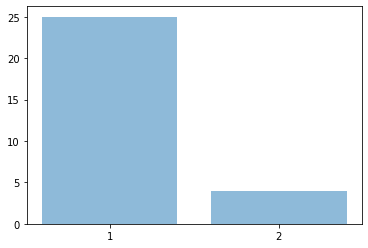

In [17]:
cal = sacar_21_caliente("spanish", 10, [7,7,5], total_games[0])
cal;

La probabilidad de completar 21 con una Baraja Española fría es aproximadamente de: 16.625675182481753 % con 548 juegos de este tipo en un fin de semana (Simulados 10.000 veces cada uno)


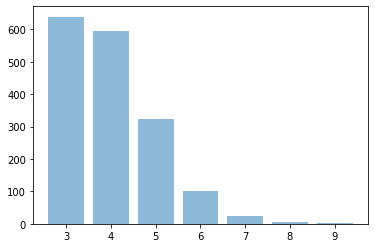

In [18]:
fri = sacar_21_fria("spanish", total_games[1])
fri;

Y se calcula el saldo final de Ben teniendo en cuenta que la probabilidad de ganar un tipo de partida es el porcentaje de partidas ganadas en ese tipo de partida (caliente o fría):

In [19]:
def calcular_saldo (pCal, pFri, intentos):

  winCal = (pCal/100) * intentos[0]
  losCal = intentos[0] - winCal
  winFri = (pFri/100) * intentos[1]
  losFri = intentos[1] - winFri

  saldo = 0
  saldo = (winCal*1000) + (winFri*10) - (losCal*1000) - (losFri*10)

  print("Las ganancias totales de Ben jugando con la Baraja Española fueron: {0}".format(saldo))

In [20]:
calcular_saldo(cal, fri, total_games)

Las ganancias totales de Ben jugando con la Baraja Española fueron: -214.62600000000384


### *Baraja de Poker*

Se juegan todas las partidas con la **Baraja de Poker**:

La probabilidad de completar 21 con una Baraja de Poker caliente con 10 cartas restantes y teniendo [7, 7, 5] (19 puntos) en la mano es aproximadamente de: 53.35096153846154 % con 52 juegos de este tipo en un fin de semana (Simulados 10.000 veces cada uno)


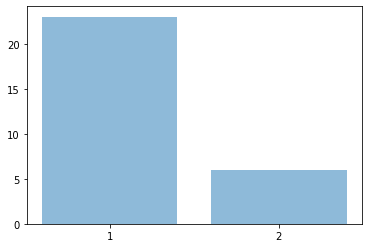

In [21]:
cal = sacar_21_caliente("poker", 10, [7,7,5], total_games[0])
cal;

La probabilidad de completar 21 con una Baraja de Poker fría es aproximadamente de: 14.010346715328467 % con 548 juegos de este tipo en un fin de semana (Simulados 10.000 veces cada uno)


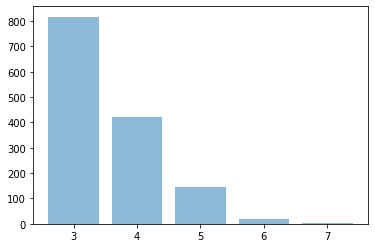

In [22]:
fri = sacar_21_fria("poker", total_games[1])
fri;

Y se calcula el saldo final de Ben teniendo en cuenta que la probabilidad de ganar un tipo de partida es el porcentaje de partidas ganadas en ese tipo de partida (caliente o fría):

In [23]:
def calcular_saldo (pCal, pFri, intentos):

  winCal = (pCal/100) * intentos[0]
  losCal = intentos[0] - winCal
  winFri = (pFri/100) * intentos[1]
  losFri = intentos[1] - winFri

  saldo = 0
  saldo = (winCal*1000) + (winFri*10) - (losCal*1000) - (losFri*10)

  print("Las ganancias totales de Ben jugando con la Baraja de Poker fueron: {0}".format(saldo))

In [24]:
calcular_saldo(cal, fri, total_games)

Las ganancias totales de Ben jugando con la Baraja de Poker fueron: -459.46600000000035
